# Importing Libraries

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json

# Gathering Data

## 1 - Twitter Archive Enhanced

In [235]:
orignal_twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
orignal_twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## 2 - Image Predictions

In [236]:
#download file from URL programatically

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
orignal_image_prediction = pd.read_csv('image-predictions-3.tsv',sep='\t')
orignal_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3 - Json txt

In [237]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""



# Twitter Didn't Allow Me To Access Their API, So I got this solution:



df_list = []

with open('tweet-json.txt', 'r') as file:
    for row in file:
        tweet = json.loads(row)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,})
        
orignal_json_txt = pd.DataFrame(df_list)
orignal_json_txt.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Copy the Original Dataframes

In [238]:
twitter_archive = orignal_twitter_archive.copy()
image_prediction = orignal_image_prediction.copy()
json_txt = orignal_json_txt.copy()

# Assesing Data

### Visual assessment of twitter archive

In [239]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Programmatic assessment

In [240]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Visual assessment of image prediction


In [241]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Programmatic assessment


In [242]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Visual assessment of json file

In [243]:
json_txt

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Programmatic assessment

In [244]:
json_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
* convert all `tweet_id` datatypes from Int64 to str

### twitter archive
* delete the retweets columns
* Delete columns that won't be used for analysis
* Separate timestamp into day - month - year (3 columns)
* convert  data type of rating_numerator & rating_denominator to float
* combine four dog types column in one column


### image prediction
* Drop 66 jpg_url duplicated
* Delete columns that won't be used for analysis
* getting True values of dogs from p1_dog, p2_dog, p3_dog columns


## Tidiness
* All tables should be part of one dataset
* ignore all NAN values

In [245]:
#twitter_archive = 
twitter_archive.retweeted_status_id.isnull()


0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352    True
2353    True
2354    True
2355    True
Name: retweeted_status_id, Length: 2356, dtype: bool

# Cleaning Data

## 1- Twitter Archive Cleaning

In [246]:
sum(twitter_archive['tweet_id'].duplicated())

0

#### define
there is many columns not need, we should drop it

#### code

In [247]:
# drop that Columns will not use
twitter_archive.drop(['source','expanded_urls','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

#### test

In [248]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   doggo               2356 non-null   object
 7   floofer             2356 non-null   object
 8   pupper              2356 non-null   object
 9   puppo               2356 non-null   object
dtypes: int64(3), object(7)
memory usage: 184.2+ KB


#### define
drop duplicated values

#### code

In [249]:
# drop duplicated values
twitter_archive.drop_duplicates(keep=False, inplace=True)

#### test

In [250]:
twitter_archive.duplicated().sum()

0

#### define
convert `tweet_id` to str

#### code

In [251]:
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].astype(str)

#### test

In [252]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   doggo               2356 non-null   object
 7   floofer             2356 non-null   object
 8   pupper              2356 non-null   object
 9   puppo               2356 non-null   object
dtypes: int64(2), object(8)
memory usage: 202.5+ KB


#### define
combine four dog types column in one column

#### code

In [253]:
# First replace None in stage columns with empty string as follows.

twitter_archive.doggo.replace('None', '', inplace=True) 
twitter_archive.floofer.replace('None', '', inplace=True)
twitter_archive.pupper.replace('None', '', inplace=True)
twitter_archive.puppo.replace('None', '', inplace=True)


# Then combine stage columns.
twitter_archive['stage'] = twitter_archive.doggo + twitter_archive.floofer + twitter_archive.pupper + twitter_archive.puppo


# Then format entries with multiple dog stages which appeared like doggopupper.

twitter_archive.loc[twitter_archive.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
twitter_archive.loc[twitter_archive.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twitter_archive.loc[twitter_archive.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### test

In [254]:
twitter_archive[twitter_archive['stage']=='doggo,floofer']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
200,854010172552949760,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but i...",11,10,None,doggo,floofer,,,"doggo,floofer"


#### define
convert timestamp to datetime, and seperate it to year, month, day, time

#### code

In [255]:
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])


twitter_archive['year'] = twitter_archive['timestamp'].dt.year
twitter_archive['month'] = twitter_archive['timestamp'].dt.month
twitter_archive['day'] = twitter_archive['timestamp'].dt.day
twitter_archive['time'] = twitter_archive['timestamp'].dt.time


#drop timestamp column
twitter_archive = twitter_archive.drop('timestamp', 1)

#### test

In [256]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   text                2356 non-null   object
 2   rating_numerator    2356 non-null   int64 
 3   rating_denominator  2356 non-null   int64 
 4   name                2356 non-null   object
 5   doggo               2356 non-null   object
 6   floofer             2356 non-null   object
 7   pupper              2356 non-null   object
 8   puppo               2356 non-null   object
 9   stage               2356 non-null   object
 10  year                2356 non-null   int64 
 11  month               2356 non-null   int64 
 12  day                 2356 non-null   int64 
 13  time                2356 non-null   object
dtypes: int64(5), object(9)
memory usage: 276.1+ KB


#### define
convert  data type of rating_numerator & rating_denominator to float


#### code

In [257]:
twitter_archive[['rating_numerator', 'rating_denominator']] = twitter_archive[['rating_numerator','rating_denominator']].astype(float)

#### test

In [258]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   object 
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   float64
 3   rating_denominator  2356 non-null   float64
 4   name                2356 non-null   object 
 5   doggo               2356 non-null   object 
 6   floofer             2356 non-null   object 
 7   pupper              2356 non-null   object 
 8   puppo               2356 non-null   object 
 9   stage               2356 non-null   object 
 10  year                2356 non-null   int64  
 11  month               2356 non-null   int64  
 12  day                 2356 non-null   int64  
 13  time                2356 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 276.1+ KB


## 2- images predictions cleaning

#### define
convert `tweet_id` to str

#### code


In [259]:
image_prediction['tweet_id'] = image_prediction['tweet_id'].astype(str)

#### test


In [260]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### define
drop 66 jpg_url duplicated values

In [261]:
#show jpg_url duplicated values
len(image_prediction[image_prediction['jpg_url'].duplicated() == True])

66

#### code

In [262]:
#drop duplicated values
image_prediction = image_prediction.drop_duplicates(subset=['jpg_url'], keep='last')


In [263]:
# there is no duplicated rows Now.
len(image_prediction[image_prediction['jpg_url'].duplicated() == True])

0

#### define
getting True values of dogs

#### code

In [264]:
# this function for getting True values of dogs, and append it in a list

dog_type = []
def dogtype(image_prediction):
    
    if image_prediction['p1_dog'] == True:
        dog_type.append(image_prediction['p1'])
    elif image_prediction['p2_dog'] == True:
        dog_type.append(image_prediction['p2'])
    elif image_prediction['p3_dog'] == True:
        dog_type.append(image_prediction['p3'])
    else:
        dog_type.append('error')

        
image_prediction.apply(dogtype, axis=1)

#create column in the dataframe
image_prediction['dog_type'] = dog_type 

# ignore that errors in dogtype column
image_prediction = image_prediction[image_prediction['dog_type'] != 'error']

<ipython-input-264-71839ed8da1a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_prediction['dog_type'] = dog_type


#### test

In [265]:
# the new column of dogstype is shown here
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1691 non-null   object 
 1   jpg_url   1691 non-null   object 
 2   img_num   1691 non-null   int64  
 3   p1        1691 non-null   object 
 4   p1_conf   1691 non-null   float64
 5   p1_dog    1691 non-null   bool   
 6   p2        1691 non-null   object 
 7   p2_conf   1691 non-null   float64
 8   p2_dog    1691 non-null   bool   
 9   p3        1691 non-null   object 
 10  p3_conf   1691 non-null   float64
 11  p3_dog    1691 non-null   bool   
 12  dog_type  1691 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 150.3+ KB


## 3- json txt

In [266]:
json_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### define
convert `tweet_id` to str

#### code

In [267]:
json_txt['tweet_id'] = json_txt['tweet_id'].astype(str)

#### test

In [268]:
json_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [269]:
# checking the duplicated values
len(json_txt[json_txt['tweet_id'].duplicated() == True])

0

# Data Analyzing

## Combining all dataframes in one Master dataframe, named `df_merge`

In [270]:
# Combining twitter_archive to json_txt
df_merge = pd.merge(twitter_archive, json_txt,on='tweet_id', how='inner')

In [271]:
df_merge.head(2)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,year,month,day,time,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,,2017,8,1,16:23:56,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,,2017,8,1,00:17:27,6514,33819


In [272]:
# Combining df_merge to image_prediction

df_merge = pd.merge(df_merge, image_prediction,on='tweet_id', how='inner')

In [273]:
df_merge.head(2)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua


In [274]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 0 to 1689
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1690 non-null   object 
 1   text                1690 non-null   object 
 2   rating_numerator    1690 non-null   float64
 3   rating_denominator  1690 non-null   float64
 4   name                1690 non-null   object 
 5   doggo               1690 non-null   object 
 6   floofer             1690 non-null   object 
 7   pupper              1690 non-null   object 
 8   puppo               1690 non-null   object 
 9   stage               1690 non-null   object 
 10  year                1690 non-null   int64  
 11  month               1690 non-null   int64  
 12  day                 1690 non-null   int64  
 13  time                1690 non-null   object 
 14  retweet_count       1690 non-null   int64  
 15  favorite_count      1690 non-null   int64  
 16  jpg_ur

### save all df in `df_master`

In [275]:
df_master = df_merge.drop(['tweet_id'], axis=1) #drop tweet_id to not calculate in describe()
df_master.describe()

,rating_numerator,rating_denominator,year,month,day,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1.690000e+03
mean,11.476331,10.533136,2015.896450,7.008284,15.939645,2799.650296,8277.368639,1.214793,0.604861,0.137090,6.136513e-02
std,8.097451,6.937710,0.696298,4.106190,8.804630,4788.007636,11593.262973,0.575311,0.266749,0.101246,5.187237e-02
min,0.000000,2.000000,2015.000000,1.000000,1.000000,16.000000,0.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,10.000000,10.000000,2015.000000,3.000000,8.000000,643.750000,1784.250000,1.000000,0.377601,0.054875,1.598680e-02
50%,11.000000,10.000000,2016.000000,7.000000,16.000000,1423.500000,3904.500000,1.000000,0.606253,0.121432,4.995100e-02
75%,12.000000,10.000000,2016.000000,11.000000,24.000000,3239.500000,10217.750000,1.000000,0.852900,0.198533,9.471785e-02
max,165.000000,150.000000,2017.000000,12.000000,31.000000,79515.000000,132810.000000,4.000000,0.999984,0.467678,2.734190e-01


### save the `df_master` to csv file


In [276]:
#save the master dataframe to csv file
df_master.to_csv('Master_dataframe.csv')

In [277]:
df_merge.head(2)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua


In [278]:
df_merge.shape

(1690, 28)

# Conclusion


# Questions
* <a href=#Insight-one> how many True dogs values?</a>
* <a href=#Insight-two>What is most dogtype rated?</a>
* <a href=#Insight-three>What is mean of (rating_numerator & rating_denominator)?</a>

## Insight one


* In df_master `p1_dog` I see there is 1479 dog, and 211 *NOT* dog.

In [279]:
df_master['p1_dog'].value_counts()

True     1479
False     211
Name: p1_dog, dtype: int64

In [280]:
#we can see dogs in False predict, so the predict was wrong as we see in the links.
df_master[df_master['p1_dog']==False].jpg_url

2       https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
43      https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg
54      https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg
74      https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg
82      https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg
                             ...                       
1646    https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg
1652    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg
1662    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg
1671    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg
1682    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
Name: jpg_url, Length: 211, dtype: object

* In df_master `p2_dog` I see there is 1499 dog, and 191 *NOT* dog

In [281]:
df_master['p2_dog'].value_counts()

True     1499
False     191
Name: p2_dog, dtype: int64

In [282]:
#we can see dogs in False values, so the prediction was wrong as we see in the links.
df_master[df_master['p2_dog']==False].jpg_url

20      https://pbs.twimg.com/ext_tw_video_thumb/88734...
25        https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg
28        https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg
43        https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg
46      https://pbs.twimg.com/ext_tw_video_thumb/88153...
                              ...                        
1621      https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg
1622      https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
1648      https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg
1661      https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg
1682      https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
Name: jpg_url, Length: 191, dtype: object

* In df_master `p3_dog` I see there is 1449 dog, and 241 *NOT* dog

In [283]:
df_master['p3_dog'].value_counts()

True     1449
False     241
Name: p3_dog, dtype: int64

In [284]:
#we can see dogs in False values, so the prediction was wrong as we see in the links.
df_master[df_master['p3_dog']==False].jpg_url

2       https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4       https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
5       https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
10      https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg
22      https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg
                             ...                       
1646    https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg
1647    https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg
1661    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg
1662    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg
1683    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
Name: jpg_url, Length: 241, dtype: object

## Insight two

* I showed the most dogs names duplicated in dataframe, the **golden retriever** is most one, and the rest of dogs name is showed as sorted in the bar.

Text(0, 0.5, 'Type of dog')

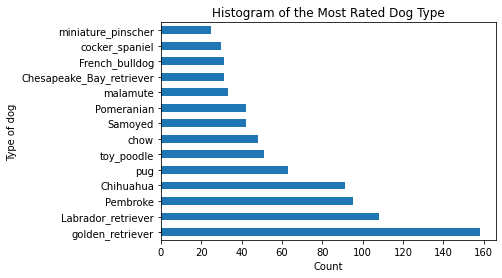

In [285]:
image_prediction = image_prediction.groupby('dog_type').filter(lambda x: len(x) >= 25)

image_prediction['dog_type'].value_counts().plot(kind='barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')



## Insight three

* here is have got the mean of rating_numerator & rating_denominator

In [286]:
# rating numerator mean
df_master['rating_numerator'].mean()

11.476331360946746

In [287]:
# rating denominator mean

df_master['rating_denominator'].mean()

10.533136094674557